<a href="https://colab.research.google.com/github/pkky/Projekty/blob/main/ProjektS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zaprogramuj algorytm rozwiązujący modyfikację TSP, gdzie miasto startowe jest inne od końcowego, z pomocą ACO.

In [1]:
# biblioteka numeryczna
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt

# pomar czasu
import time

# skumulowana suma tablicy
from itertools import accumulate

from itertools import permutations

Problem TSP

In [2]:
n=10 # dla algorytmu mrówkowego

cities = np.array([[random.random(),random.random()] for i in range(n)]) # lista współrzędnych miast
cities

array([[0.15011133, 0.01932884],
       [0.87078047, 0.94061242],
       [0.69721858, 0.88823018],
       [0.94439849, 0.10030654],
       [0.17993135, 0.44668826],
       [0.25556428, 0.3306258 ],
       [0.70520637, 0.86850082],
       [0.59365836, 0.95332501],
       [0.34233448, 0.87934306],
       [0.54245859, 0.10047076]])

In [3]:
x = n-1

In [4]:
# odległość euklidesowa
def dist(i,j):
    return np.sqrt((cities[i,0]-cities[j,0])**2 + (cities[i,1]-cities[j,1])**2)

In [5]:
# długość drogi
def len_path(path): #path to dowolna ścieżka; daje długośc ścieżki łączącej miasta
    return sum([dist(path[i],path[i+1]) for i in range(x)])

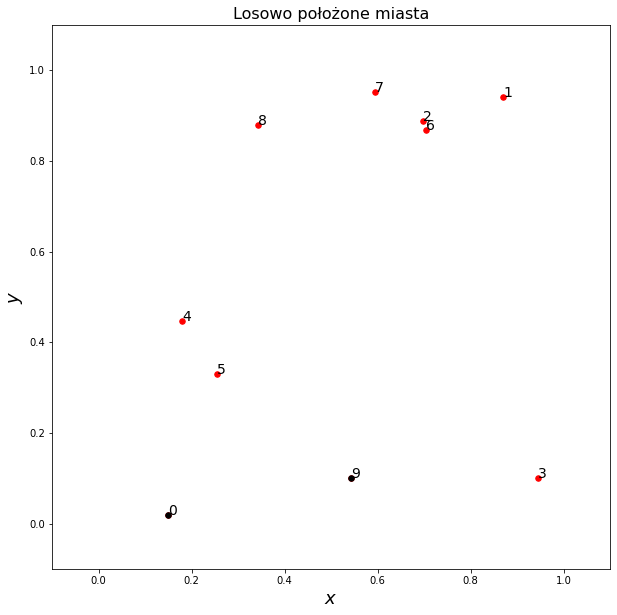

In [6]:
plo_cities=plt.figure(figsize=(10,10))
plt.title("Losowo położone miasta",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.scatter(cities[:,0],cities[:,1],c='red', s=30)
plt.scatter(cities[0,0],cities[0,1],c='black',s=30)
plt.scatter(cities[n-1,0],cities[n-1,1],c='black',s=30)

for i in range(n):
    plt.annotate(i, (cities[i,0], cities[i,1]),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [7]:
# losowa droga - np.random.permutation 
# dodanie miasta 0 na początku i na końcu
sequence = np.insert(np.append(np.random.permutation(x-1)+1,n-1),0,0)  #sekwencja miast z losową permutacją
sequence

array([0, 3, 5, 8, 1, 7, 2, 4, 6, 9])

In [8]:
# powyżej była lista miast, teraz lista odpowiadających im współrzędnych
tour = np.array([cities[i] for i in sequence])
# porównaj wizualnie z powyższym rysunkiem
tour

array([[0.15011133, 0.01932884],
       [0.94439849, 0.10030654],
       [0.25556428, 0.3306258 ],
       [0.34233448, 0.87934306],
       [0.87078047, 0.94061242],
       [0.59365836, 0.95332501],
       [0.69721858, 0.88823018],
       [0.17993135, 0.44668826],
       [0.70520637, 0.86850082],
       [0.54245859, 0.10047076]])

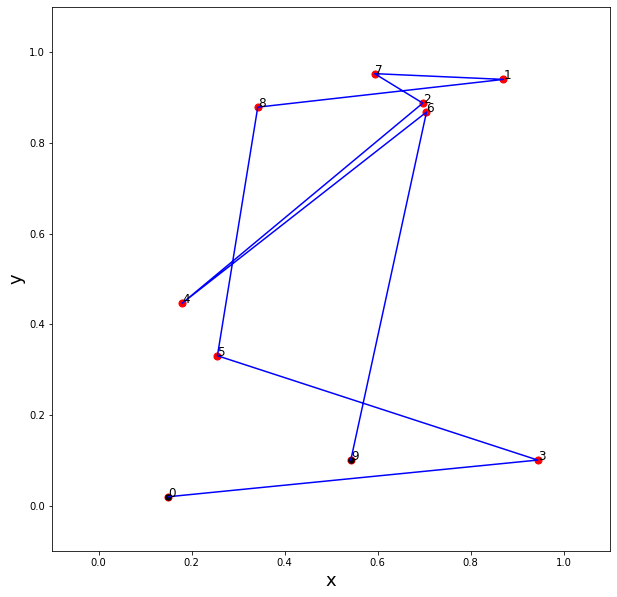

In [9]:
plt.figure(figsize=(10,10))

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

plt.plot(tour[:,0],tour[:,1],c='blue')

plt.scatter(cities[:,0],cities[:,1],c='red',s=50)
plt.scatter(cities[0,0],cities[0,1],c='black',s=30)
plt.scatter(cities[x,0],cities[x,1],c='black',s=30)

for i in range(n):
    plt.annotate(i,(cities[i,0],cities[i,1]),fontsize=12)

plt.xlabel("x",fontsize=18)
plt.ylabel("y",fontsize=18);

ACO dla TSP

In [10]:
# tablica odległości między miastami
dis_tab = np.array([[dist(i,j) for i in range(n)] for j in range(n)])
np.round(dis_tab,2) # zaokrąglenie dla przejrzystości wydruku

array([[0.  , 1.17, 1.03, 0.8 , 0.43, 0.33, 1.01, 1.03, 0.88, 0.4 ],
       [1.17, 0.  , 0.18, 0.84, 0.85, 0.87, 0.18, 0.28, 0.53, 0.9 ],
       [1.03, 0.18, 0.  , 0.83, 0.68, 0.71, 0.02, 0.12, 0.35, 0.8 ],
       [0.8 , 0.84, 0.83, 0.  , 0.84, 0.73, 0.8 , 0.92, 0.98, 0.4 ],
       [0.43, 0.85, 0.68, 0.84, 0.  , 0.14, 0.67, 0.65, 0.46, 0.5 ],
       [0.33, 0.87, 0.71, 0.73, 0.14, 0.  , 0.7 , 0.71, 0.56, 0.37],
       [1.01, 0.18, 0.02, 0.8 , 0.67, 0.7 , 0.  , 0.14, 0.36, 0.79],
       [1.03, 0.28, 0.12, 0.92, 0.65, 0.71, 0.14, 0.  , 0.26, 0.85],
       [0.88, 0.53, 0.35, 0.98, 0.46, 0.56, 0.36, 0.26, 0.  , 0.8 ],
       [0.4 , 0.9 , 0.8 , 0.4 , 0.5 , 0.37, 0.79, 0.85, 0.8 , 0.  ]])

In [11]:
# początkowa tablica feromonów - na razie wszędzie tyle samo!
fero = np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n)
fero

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

In [12]:
# parametry modelu dot. prawdopodobieństwa wyboru drogi przez mrówkę

alpha = 1.15;
beta = 1;

h = 0.03; # szybkość uaktualniania śladów feromonowych
# po kolejnym etapie algorytmu feromony_nowe = (1-h) feromony_stare + h feromony_złożone

popsize = 10; # liczba mrówek "na trasie" w kolejnym etapie algorytmu

sc = n/popsize; # kontroluje, ile feromonu jest zostawiane = liczba miast/liczba mrówek

# odkładana przez mrówkę ilość feromonu to sc/długość odcinka

In [13]:
# Zwraca (losowo) miasto do odwiedzenia z listy miast togo, jeśli mrówka jest w mieście i.
# Stosujemu oczywiście naszą maszynke ind_prob.

def ac_next(i, togo):
    p = np.array([fero[i, j]**alpha/dis_tab[i, j]**beta for j in togo]) # wagi
    su = np.sum(p) # suma wag
    p = p/su # prawdopodobieństwa (wagi znormalizowane do 1)
    return togo[ind_prob(p)]

In [14]:
to_v = [i for i in range(1,n)] # miasta do odwiedzenia (na razie wszystkie)
to_v

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
# zebranie powyższych instrukcji w jedną funkcję
def ind_prob(tab_p):
    cum_p = np.array(list(accumulate(tab_p)))
    return np.sum(np.heaviside(random.random()-cum_p,0)).astype(int)

In [16]:
# tablica prawdopodobieństw
tab_p = np.array([0.5, 0.2, 0.1, 0.2])
cum_p = np.array(list(accumulate(tab_p)))
np.round(cum_p,2)

array([0.5, 0.7, 0.8, 1. ])

In [17]:
ind_prob(tab_p)

3

In [18]:
ac_next(0,to_v) # losowo wybrane kolejne miasto, jeśli mrówka jest w mieście 0

9

In [19]:
tt=[ac_next(0,to_v) for _ in range(10000)] # 10000 wyborów (na próbę)

In [20]:
# jeden etap algorytmu
# liczba pop mrówek wyrusza w trasę, każda z losowo wybranego miasta

def ac_one(pop):
    lm=10**10 # coś dużego - aktualna długość najlepszej trasy
    global fero2 # macierz "nowych" feromonów, które zostawią mrówki
    fero2=np.array([[0. for _ in range(n)] for _ in range(n)]) # inicjalizacja jako 0
    for mr in range(pop): # petla po mrówkach
        print()
        print("mrówka nr ",mr)
        print()
        #pos=random.randint(0,n-1) # początkowe losowe miasto dla danej mrówki
        pos=0
        route=[pos] # dodanie miasta początkowego do trasy
        print(pos)
        to_v=[i for i in range(0,pos)]+[i for i in range(pos+1,n)] # miasta do odwiedzenia
        print(to_v)
        
        for k in range(n-1): # pętla po liczbie miast do odwiedzenia
            pos=ac_next(pos,to_v) # nastepne miasto, wybrane wg prawdopodobieństwa ...
            #route.append(pos) # dodanie tego miasta do trasy
            route.append(pos)
            to_v.remove(pos)  # usunięcie z listy miast do odwiedzenia
            print(pos)
            print(to_v)
            
        #route.append(n-1) # dodanie na końcu trasy początkowego miasta 
          # (mrówka wraca do punktu startowego)    
        print(route)
        
        lr=len_path(route) # długość trasy
        print("obecna długość",lr)
        if lr<lm: # jeśli trasa jest krótsza od aktualnie najlepszej ... 
            lm=lr # ... to uaktualnij długość najkrótszej trasy ...
            r_opt=route # ... i zapamietaj ją jako r_opt
        print("najkrótsza długość",lm)    
            
    for i in range(n-1): # pozostawione feromony na każdym odcinku trasy
        fero2[r_opt[i],r_opt[i+1]]=fero2[r_opt[i],r_opt[i+1]]+sc/lm # w przód
        fero2[r_opt[i+1],r_opt[i]]=fero2[r_opt[i+1],r_opt[i]]+sc/lm # wspak
            # symetryzujemy dla symetrycznego problemu TSP - w ogólności nie musi tak być            
          
    return lm, r_opt # zwróć długość najkrótszej trasy i trasę
    

In [21]:
opt=ac_one(3) # działanie powyższego algorytmu dla 3 mrówek


mrówka nr  0

0
[1, 2, 3, 4, 5, 6, 7, 8, 9]
6
[1, 2, 3, 4, 5, 7, 8, 9]
2
[1, 3, 4, 5, 7, 8, 9]
4
[1, 3, 5, 7, 8, 9]
7
[1, 3, 5, 8, 9]
1
[3, 5, 8, 9]
8
[3, 5, 9]
5
[3, 9]
9
[3]
3
[]
[0, 6, 2, 4, 7, 1, 8, 5, 9, 3]
obecna długość 4.504680366124333
najkrótsza długość 4.504680366124333

mrówka nr  1

0
[1, 2, 3, 4, 5, 6, 7, 8, 9]
5
[1, 2, 3, 4, 6, 7, 8, 9]
6
[1, 2, 3, 4, 7, 8, 9]
2
[1, 3, 4, 7, 8, 9]
1
[3, 4, 7, 8, 9]
8
[3, 4, 7, 9]
7
[3, 4, 9]
3
[4, 9]
9
[4]
4
[]
[0, 5, 6, 2, 1, 8, 7, 3, 9, 4]
obecna długość 3.85182968018613
najkrótsza długość 3.85182968018613

mrówka nr  2

0
[1, 2, 3, 4, 5, 6, 7, 8, 9]
9
[1, 2, 3, 4, 5, 6, 7, 8]
8
[1, 2, 3, 4, 5, 6, 7]
7
[1, 2, 3, 4, 5, 6]
6
[1, 2, 3, 4, 5]
2
[1, 3, 4, 5]
5
[1, 3, 4]
1
[3, 4]
3
[4]
4
[]
[0, 9, 8, 7, 6, 2, 5, 1, 3, 4]
obecna długość 4.8887138862769275
najkrótsza długość 3.85182968018613


In [22]:
np.round(fero2,2) # złożone feromony 

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.26, 0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  ],
       [0.  , 0.26, 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.26],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.26],
       [0.26, 0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.26, 0.  , 0.  , 0.26, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.26, 0.  , 0.  , 0.  , 0.  , 0.26, 0.  ],
       [0.  , 0.26, 0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.26, 0.26, 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [23]:
opt # najkrótsza znaleziona trasa

(3.85182968018613, [0, 5, 6, 2, 1, 8, 7, 3, 9, 4])

In [24]:
# cały algorytm mrówkowy dla TSP (10 linijek + 20 linijek kodu ac_one)

iter=200
# iter=10000 # liczba iteracji dla n=50

min_l=10**10 # coś dużego, początkowa długość najlepszej drogi (numeryczna nieskonczoność)
fero=np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n) 
     # początkowa macierz feromonów

for k in range(iter):   # pętla po iteacjach
    opt=ac_one(popsize) # jeden "zespół" popsize mrówek na trasie

    if opt[0]<min_l: # jeśli znaleziona droga krótsza, uaktualnij ...
        min_l=opt[0] # ... jej długość ...
        best_route=opt[1] # ... i trasę
        print('zmiana w kroku ',k) # wydruk, by było widać, że optimum się zmienia
# ważne!         
    fero=(1-h)*fero+h*fero2 # uaktualnienie macierzy feromonów
        # parowanie "starego" feromonu, dodanie nowego

print()
print(min_l, best_route) # najlepsza trasa
print()
    
print(np.round(fero,2)) # końcowa macierz feromonów


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
5
[1, 2, 3, 4, 6, 7, 8, 9]
4
[1, 2, 3, 6, 7, 8, 9]
8
[1, 2, 3, 6, 7, 9]
7
[1, 2, 3, 6, 9]
2
[1, 3, 6, 9]
6
[1, 3, 9]
1
[3, 9]
3
[9]
9
[]
[0, 5, 4, 8, 7, 2, 6, 1, 3, 9]
obecna długość 2.7609866266401686
najkrótsza długość 2.7609866266401686

mrówka nr  9

0
[1, 2, 3, 4, 5, 6, 7, 8, 9]
5
[1, 2, 3, 4, 6, 7, 8, 9]
4
[1, 2, 3, 6, 7, 8, 9]
8
[1, 2, 3, 6, 7, 9]
7
[1, 2, 3, 6, 9]
2
[1, 3, 6, 9]
6
[1, 3, 9]
1
[3, 9]
3
[9]
9
[]
[0, 5, 4, 8, 7, 2, 6, 1, 3, 9]
obecna długość 2.7609866266401686
najkrótsza długość 2.7609866266401686

mrówka nr  0

0
[1, 2, 3, 4, 5, 6, 7, 8, 9]
5
[1, 2, 3, 4, 6, 7, 8, 9]
4
[1, 2, 3, 6, 7, 8, 9]
8
[1, 2, 3, 6, 7, 9]
7
[1, 2, 3, 6, 9]
2
[1, 3, 6, 9]
6
[1, 3, 9]
1
[3, 9]
9
[3]
3
[]
[0, 5, 4, 8, 7, 2, 6, 1, 9, 3]
obecna długość 2.819478346549681
najkrótsza długość 2.819478346549681

mrówka nr  1

0
[1, 2, 3, 4, 5, 6, 7, 8, 9]
5
[1, 2, 3, 4, 6, 7, 8, 9]
4
[1, 2, 3, 6, 7, 8, 9]
8
[1, 2, 3, 6, 7, 9]
7
[1, 2, 3

In [25]:
best_route

[0, 3, 9, 5, 4, 8, 7, 2, 6, 1]

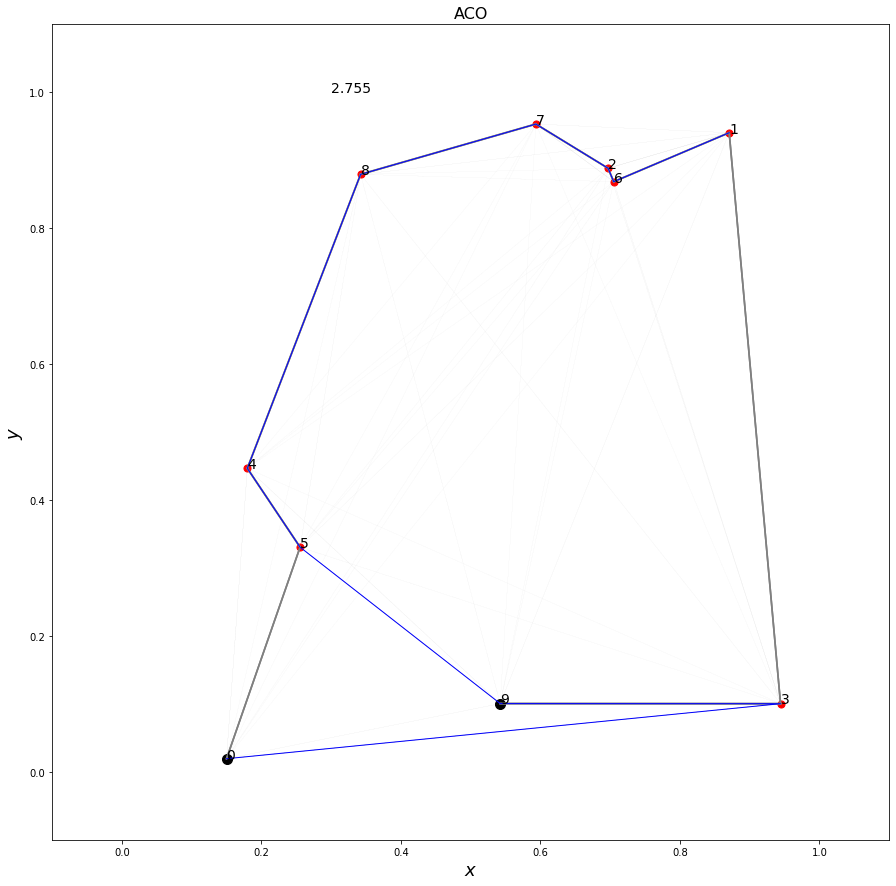

In [26]:
plo_mro=plt.figure(figsize=(15,15))
plt.title("ACO",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

# grafika ilustrujaca gęstość feromonów poprzez grubość linii
for i in range(n):
    for j in range(n):
        plt.plot([cities[i,0],cities[j,0]],[cities[i,1],cities[j,1]],
                 c="gray",linewidth=5*fero[i,j]) # grubosć linii prop. do gestości feromonów

bb=np.array([cities[i] for i in best_route])
plt.plot(bb[:,0],bb[:,1],c='blue',linewidth=1)


plt.scatter(cities[:,0],cities[:,1],c='red', s=50)
plt.scatter(cities[0,0],cities[0,1],c='black',s=100)
plt.scatter(cities[x,0],cities[x,1],c='black',s=100)

for i in range(n):
    plt.annotate(i, (cities[i,0], cities[i,1]),fontsize=14)

mm=np.round(min_l,3)
plt.annotate(mm, (.3,1),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);